In [1]:
import numpy as np
from mbipy.numpy.phase_retrieval.implicit import lcs_ddf, lcs_df, lcs_ddf_colored
import glob
import fabio
import matplotlib.pyplot as plt


In [2]:
ref = ''
sample = ''
save_path = '/home/philipp/projects/mbi/phase_retrieval/data/2021-06-07/phase_retrieval/'
weak_absorption = False



In [3]:
def open_image(filename):
    """opens a 2D image

    Args:
        filename (str): file name

    Returns:
        (numpy.ndarray): 2D image
    """
    filename = str(filename)
    if "edf" in filename:
        im = fabio.open(filename)
        return im.data
    elif "tif" in filename or "tiff" in filename:
        im = fabio.open(filename)
        return im.data

In [4]:
def open_sequence(filenames):
    """Opens a sequence of images.

    Args:
        filenames (list): List of file names.
        extension (str): File extension.

    Returns:
        numpy.ndarray: Sequence of 2D images.
    """
    assert isinstance(filenames, list) and len(filenames) > 0, 'Error: no file corresponds to the given path/extension'

    return np.array([open_image(str(file)) for file in filenames], dtype=np.float32)

In [5]:
def list_files_with_extension(path, extension):
    """Liste les fichiers d'un dossier ayant une certaine extension.
    
    Args:
        path (str): Chemin du dossier.
        extension (str): Extension des fichiers à rechercher.
    returns:
        list: Liste des fichiers correspondant au critère de recherche.
    """

    assert os.path.exists(path), f"Le chemin fourni n'existe pas : {path}"
    assert os.path.isdir(path), f"Le chemin fourni n'est pas un dossier : {path}"

    return  glob.glob(os.path.join(path, '*.' + extension)).sort()

In [6]:
refFiles=glob.glob('/Volumes/T7/fibers_clara/ref/*.edf')
refFiles.sort()
refs=open_sequence(refFiles)
refs=refs[:,:,:]

sampleFiles=glob.glob('/Volumes/T7/fibers_clara/sample/*.edf')
sampleFiles.sort()
samples=open_sequence(sampleFiles)
samples=samples[:,:,:]

In [7]:
result = lcs_ddf(samples, refs,alpha=1e-4,weak_absorption=True)

In [8]:
result_1 = lcs_df(samples, refs,alpha=1e-4,weak_absorption=True)

In [9]:
a,b = lcs_ddf_colored(samples, refs,alpha=1e-4,weak_absorption=True)

(1030, 514, 3, 4)
(1030, 514, 12)


/Users/samy/mbipy_froked/mbipy_froked/mbipy/src/phase_retrieval/implicit/utils.py:386: RuntimeWarning: invalid value encountered in cast
  i = (h * 6.0).astype(int)


In [10]:
print(a.shape)
print(b.shape)


(1030, 514, 12)
(1030, 514, 3, 4)


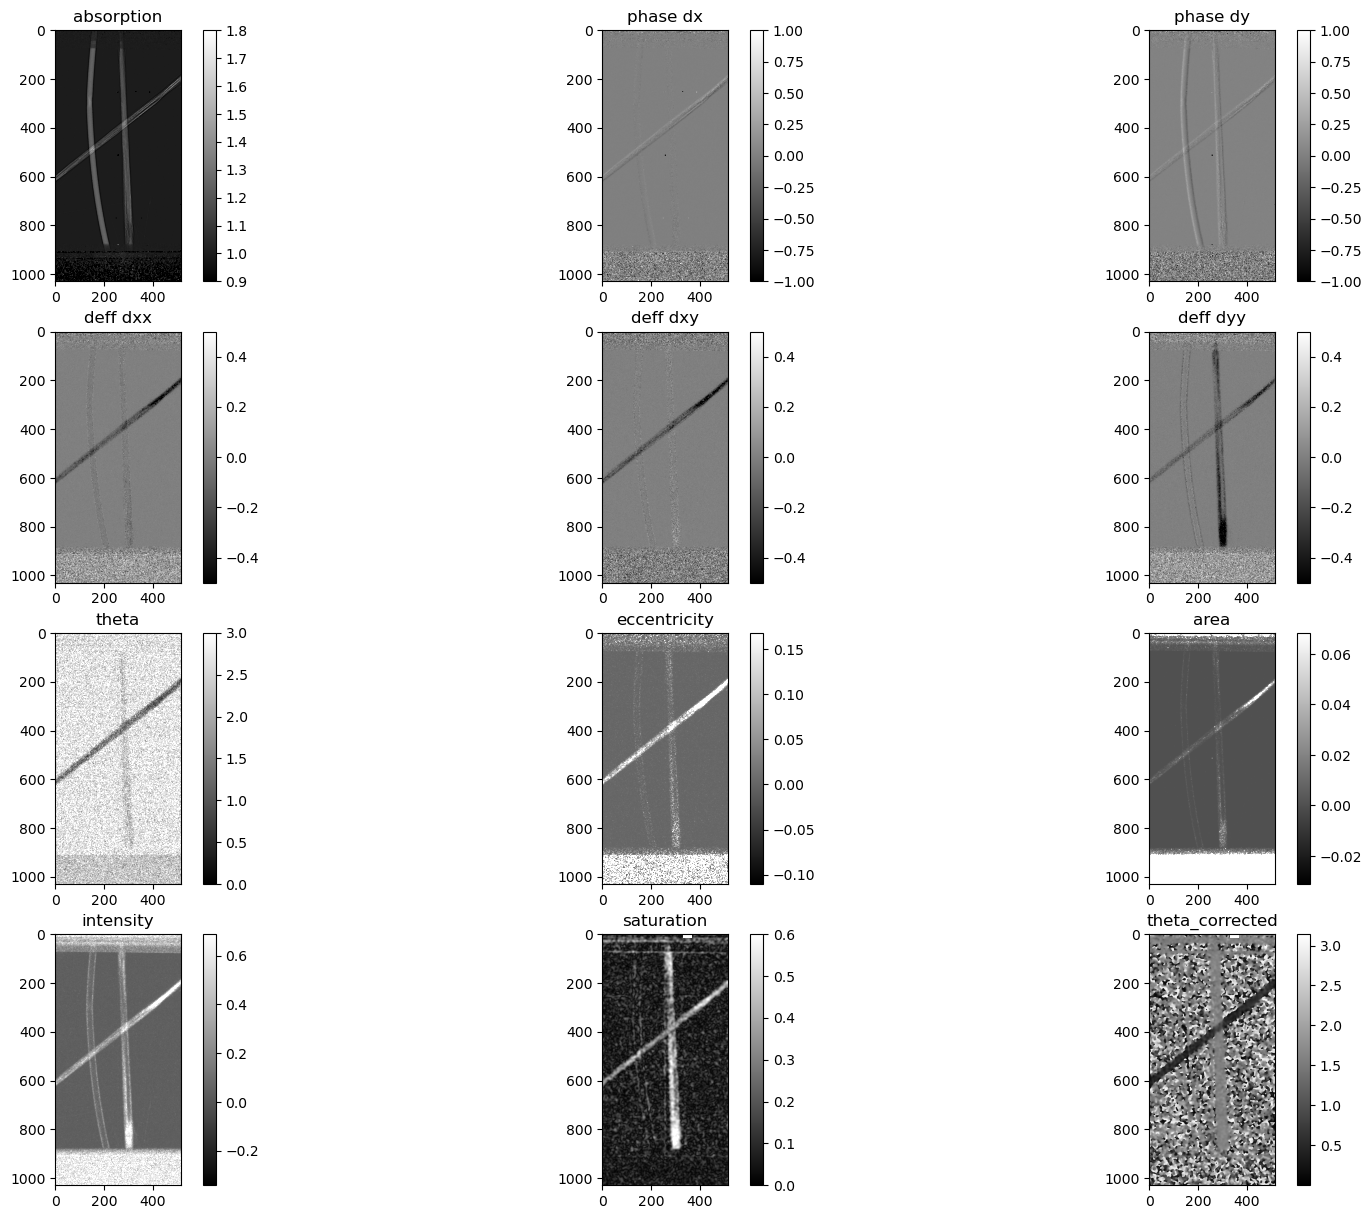

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(4,3,1)
plt.imshow(a[...,0],cmap='gray',vmin=0.9,vmax=1.8)
plt.title('absorption')
plt.colorbar()
plt.subplot(4,3,2)
plt.imshow(a[...,1],cmap='gray',vmin=-1,vmax=1)
plt.title('phase dx')
plt.colorbar()
plt.subplot(4,3,3)
plt.imshow(a[...,2],cmap='gray',vmin=-1,vmax=1)
plt.title('phase dy')
plt.colorbar()
plt.subplot(4,3,4)
plt.imshow(a[...,3],cmap='gray',vmin=-0.5,vmax=0.5)
plt.title('deff dxx')
plt.colorbar()
plt.subplot(4,3,5)
plt.imshow(a[...,4],cmap='gray',vmin=-0.5,vmax=0.5)
plt.title('deff dxy')
plt.colorbar()
plt.subplot(4,3,6)
plt.imshow(a[...,5],cmap='gray',vmin=-0.5,vmax=0.5)
plt.title('deff dyy')
plt.colorbar()
plt.subplot(4,3,7)
plt.imshow(a[...,6],cmap='gray',vmin=0,vmax=3)
plt.title('theta')
plt.colorbar()
plt.subplot(4,3,8)
plt.imshow(a[...,7],cmap='gray',vmin=np.mean(a[...,7])-1*np.std(a[...,7]),vmax=np.mean(a[...,7])+1*np.std(a[...,7]))
plt.title('eccentricity')
plt.colorbar()
plt.subplot(4,3,9)
plt.imshow(a[...,8],cmap='gray',vmin=np.mean(a[...,8])-0.5*np.std(a[...,8]),vmax=np.mean(a[...,8])+0.25*np.std(a[...,8]))
plt.title('area')
plt.colorbar()
plt.subplot(4,3,10)
plt.imshow(a[...,9],cmap='gray',vmin=np.mean(a[...,9])-2*np.std(a[...,9]),vmax=np.mean(a[...,9])+2*np.std(a[...,9]))
plt.title('intensity')
plt.colorbar()
plt.subplot(4,3,11)
plt.imshow(a[...,10],cmap='gray',vmin=0,vmax=0.6)
plt.title('saturation')
plt.colorbar()
plt.subplot(4,3,12)
plt.imshow(a[...,11],cmap='gray')
plt.title('theta_corrected')
plt.colorbar()
plt.show()

/Users/samy/miniconda3/envs/PARESIS/lib/python3.9/site-packages/matplotlib/cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


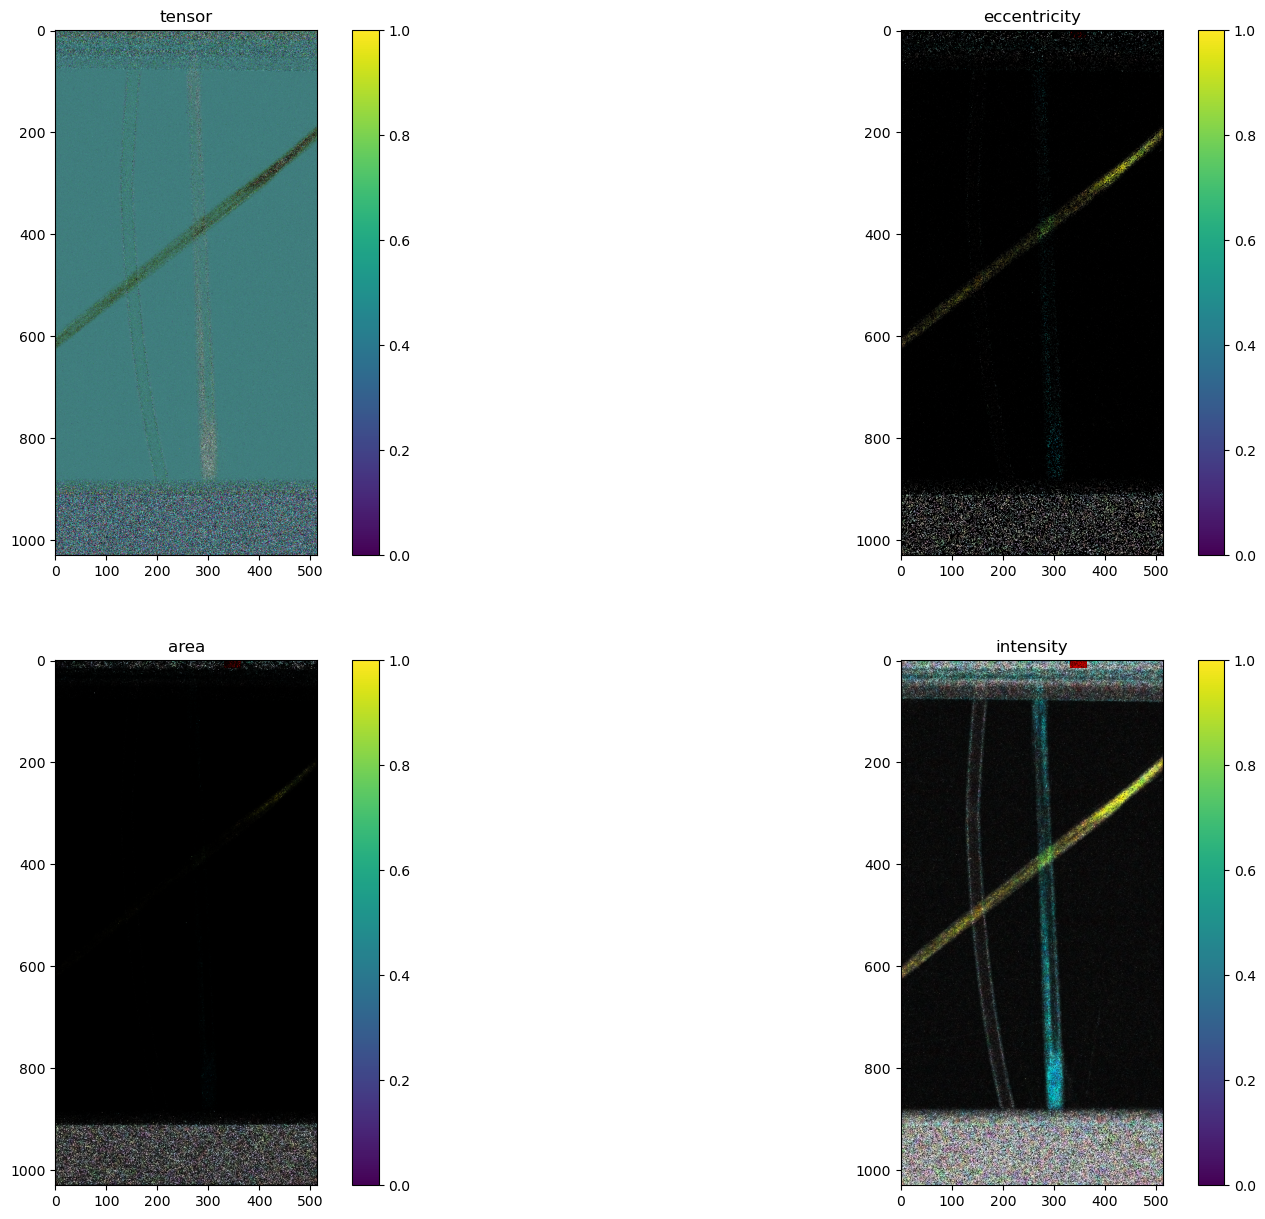

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.imshow(b[...,0])
plt.title('tensor')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(b[...,1])
plt.title('eccentricity')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(b[...,2])
plt.title('area')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(b[...,3])
plt.title('intensity')
plt.colorbar()
plt.show()


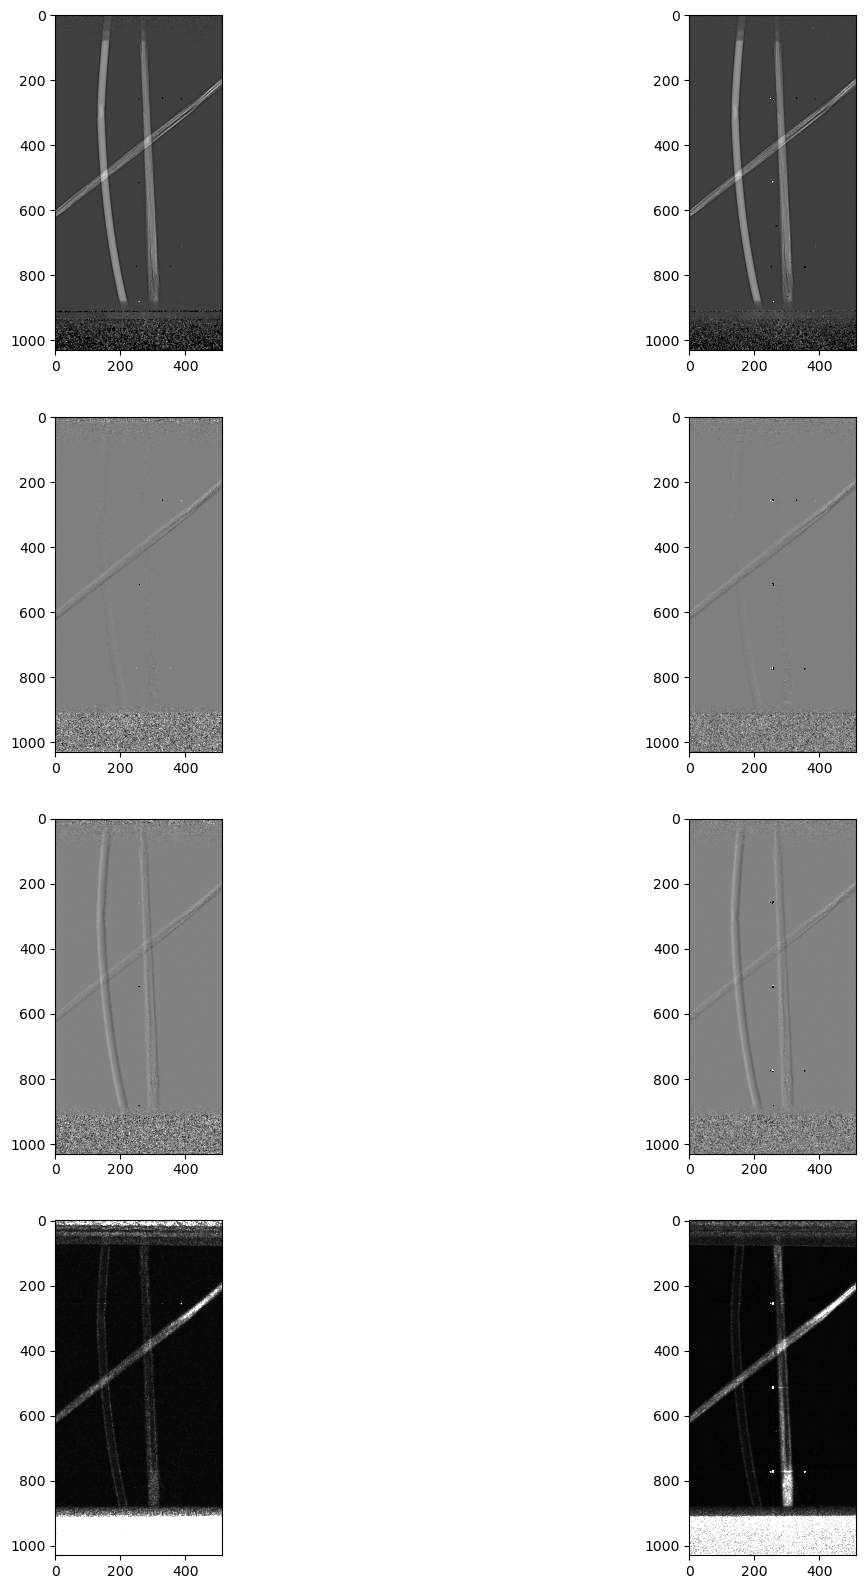

In [34]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
plt.imshow(result[...,0],cmap='gray',vmin=0.8,vmax=1.6)
plt.subplot(4,2,2)
plt.imshow(result_1[...,0],cmap='gray',vmin=0.8,vmax=1.6)
plt.subplot(4,2,3)
plt.imshow(result[...,1],cmap='gray',vmin=-1,vmax=1)
plt.subplot(4,2,4)
plt.imshow(result_1[...,1],cmap='gray',vmin=-1,vmax=1)
plt.subplot(4,2,5)
plt.imshow(result[...,2],cmap='gray',vmin=-1,vmax=1)
plt.subplot(4,2,6)
plt.imshow(result_1[...,2],cmap='gray',vmin=-1,vmax=1)
plt.subplot(4,2,7)
plt.imshow(np.abs(result[...,3]),cmap='gray',vmin=0,vmax=0.6)
plt.subplot(4,2,8)
plt.imshow(np.abs(result_1[...,3]),cmap='gray',vmin=0,vmax=0.2)
plt.show()


In [35]:
resulta= np.where(result[...,3:]==0,1,result[...,3:])
resulta= np.where(result[...,3:]>1,1e-7,result[...,3:])

In [36]:
print(resulta.shape)

(1030, 514, 3)


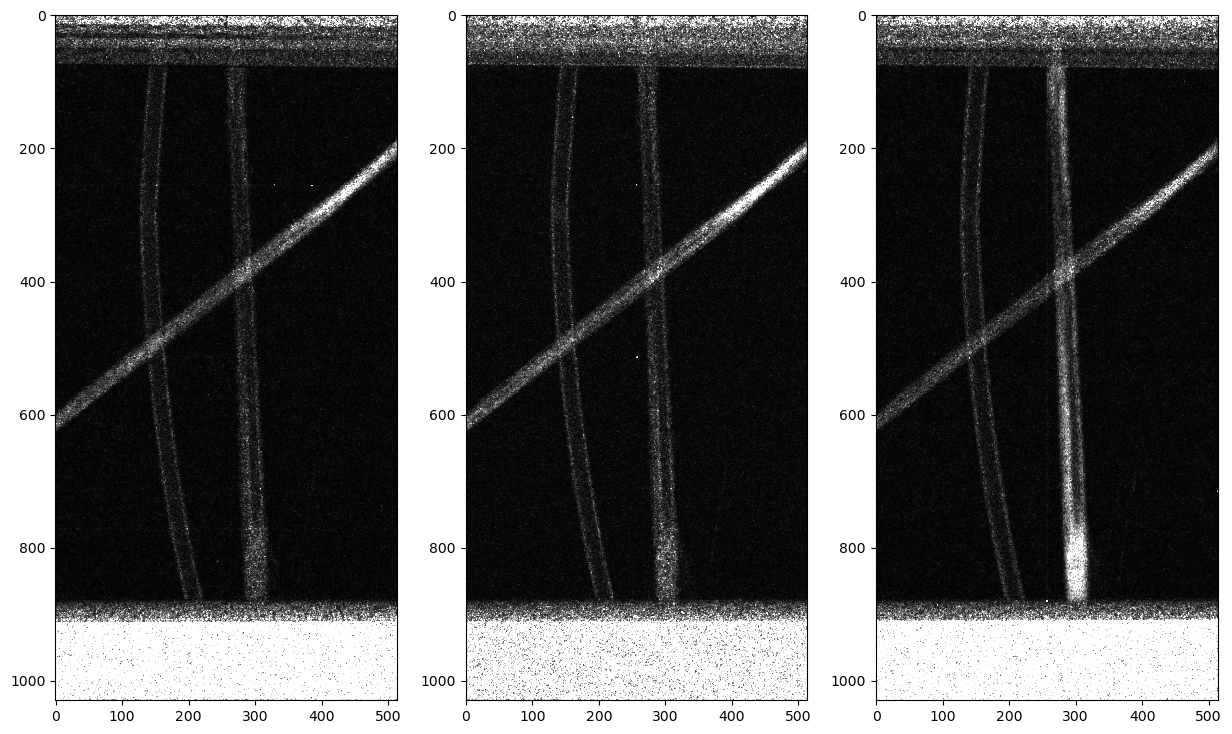

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(np.abs(result[...,3]),cmap='gray',vmin=0,vmax=0.6)
plt.subplot(1,3,2)
plt.imshow(np.abs(result[...,4]),cmap='gray',vmin=0,vmax=0.6)
plt.subplot(1,3,3)
plt.imshow(np.abs(result[...,5]),cmap='gray',vmin=0,vmax=0.6)
plt.show()



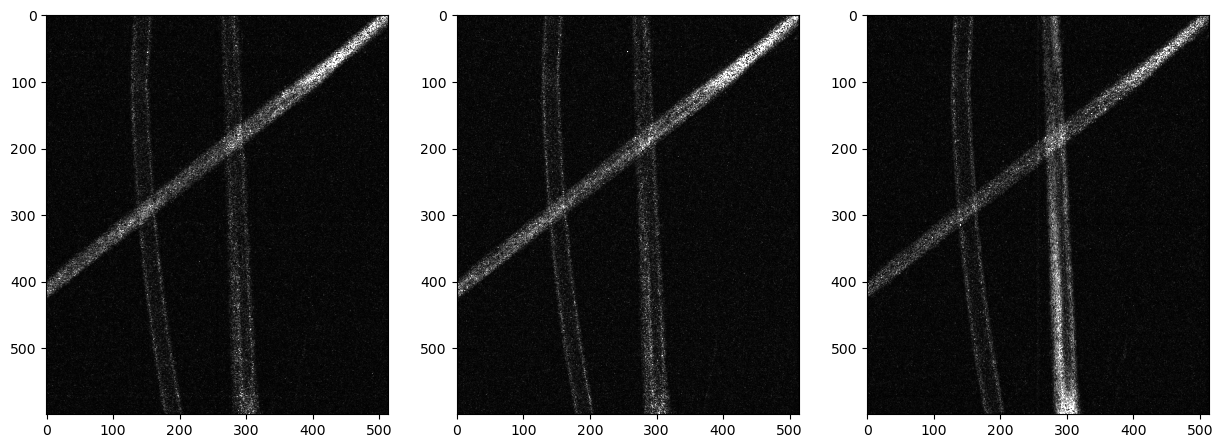

In [244]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(np.abs(resulta[...,0]),cmap='gray',vmin=0,vmax=0.6)
plt.subplot(1,3,2)
plt.imshow(np.abs(resulta[...,1]),cmap='gray',vmin=0,vmax=0.6)
plt.subplot(1,3,3)
plt.imshow(np.abs(resulta[...,2]),cmap='gray',vmin=0,vmax=0.6)
plt.show()

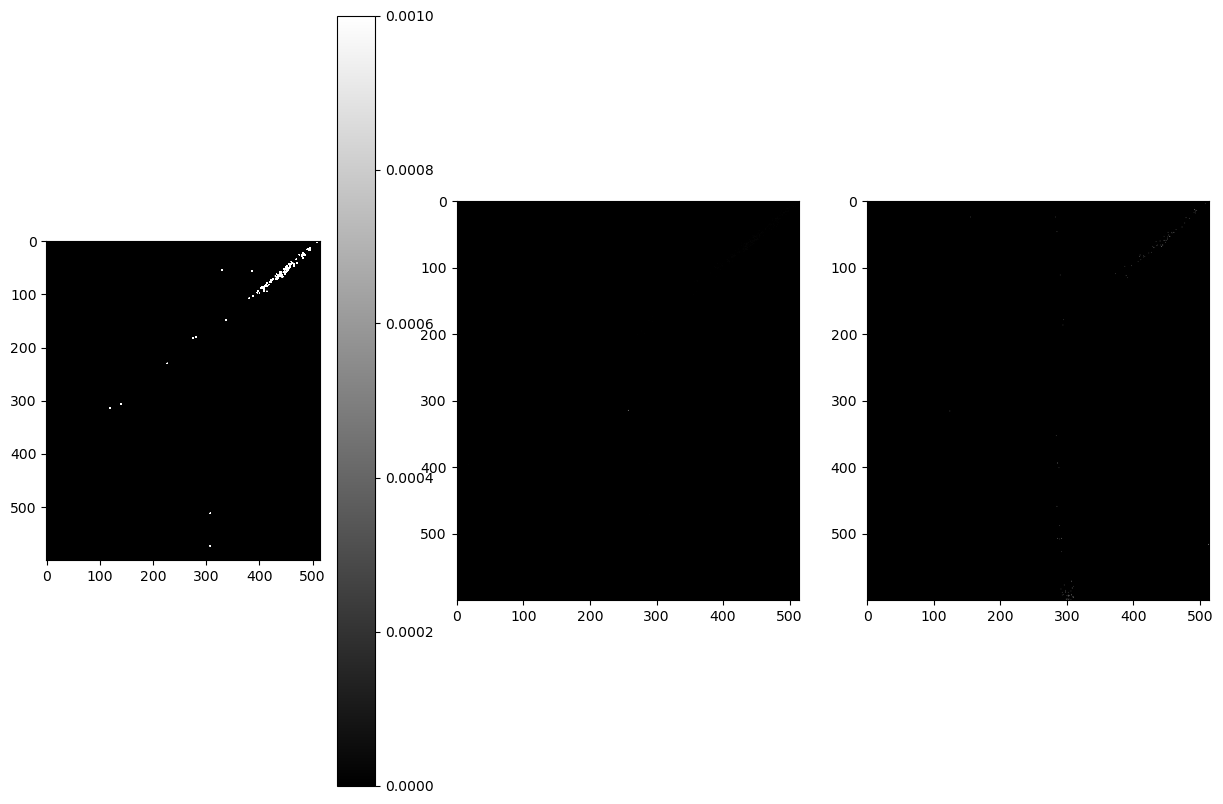

In [210]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(np.abs(result[...,3])-np.abs(resulta[...,0]),cmap='gray',vmin=0,vmax=0.001)
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(result[...,4])-np.abs(resulta[...,1]),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.abs(result[...,5])-np.abs(resulta[...,2]),cmap='gray')
plt.show()

In [40]:
import numpy as np
from scipy.ndimage import gaussian_filter 

from matplotlib.colors import hsv_to_rgb


def From_tensor_to_elipse(Df_xx, Df_yy, Df_xy):
    
    a11 = Df_xx * Df_xy
    a22 = Df_yy * Df_xy
    a12 = 0.5 * Df_xx * Df_yy

    # Calculate theta
    theta = 0.5 * np.arctan2(2*a12, a11 - a22)
    
    #Compute the semi-major and semi-minor axis
    a = np.sqrt(np.abs(a11*np.cos(theta)**2 + a22*np.sin(theta)**2 + 2*a12*np.cos(theta)*np.sin(theta)))
    b = np.sqrt(np.abs(a11*np.sin(theta)**2 + a22*np.cos(theta)**2 - 2*a12*np.cos(theta)*np.sin(theta)))
    

    theta = np.where(theta < 0, theta + np.pi, theta)
    theta = np.where(theta >= 2*np.pi, theta - 2*np.pi, theta)
    theta = np.where(a < b, theta + np.pi/2, theta)
    
    mask = wrong_elipse_mask(a11,a22,a12)
    
    excentricity = (a-b)
    
    excentricity_corrected = np.where(mask, 0, excentricity)
    
    
    
    area = np.pi * a * b
    
    return excentricity_corrected, area, theta
    
    
    
    
    


def wrong_elipse_mask(a11,a22,a12):
    return np.logical_or(a11*a22 - a12**2 <= 0, a11*a22 <= 0)



def clip_values(Df_xx,Df_yy,Df_xy,threshold,epsilon):
    sign_values_df_xy = np.sign(Df_xy)
    Df_xx = np.where(np.logical_or(Df_xx  == 0, np.abs(Df_xx) > threshold), epsilon, Df_xx)
    Df_yy = np.where(np.logical_or(Df_yy  == 0, np.abs(Df_yy) > threshold), epsilon, Df_yy)
    Df_xy = np.where(np.logical_or(Df_xy  == 0, np.abs(Df_xy) > threshold), epsilon*sign_values_df_xy, Df_xy)
    return Df_xx,Df_yy,Df_xy,sign_values_df_xy


def DDF_metrics(Df_xx,Df_yy,Df_xy,Df_theta, sigma=5):
    padding_value = 6*np.round(sigma)
    Df_theta_padded = np.pad(Df_theta, padding_value, mode='reflect')
    wcos = gaussian_filter(np.cos(2 * np.where(Df_theta_padded == 0, np.nan, Df_theta_padded)),
                       sigma=sigma/np.sqrt(2), mode='reflect', cval=0)
    wsin = gaussian_filter(np.sin(2 * np.where(Df_theta_padded == 0, np.nan, Df_theta_padded)),
                       sigma=sigma/np.sqrt(2), mode='reflect', cval=0)
    
    wcos = wcos[padding_value:-padding_value, padding_value:-padding_value]
    wsin = wsin[padding_value:-padding_value, padding_value:-padding_value]
    saturation = np.sqrt(wcos**2 + wsin**2)
    theta_corrected = 0.5*np.arctan2(wsin, wcos)
    
    theta_corrected = np.where(theta_corrected < 0, theta_corrected + np.pi, theta_corrected)
    theta_corrected = np.where(theta_corrected >= 2*np.pi, theta_corrected - 2*np.pi, theta_corrected)
    theta_corrected = np.where(np.logical_and(wcos == 0, wsin == 0), 0, theta_corrected)
    
    return saturation, theta_corrected

def normalize_values(image,nb_of_std=1, define_min = False):
    mean = np.mean(image)
    std = np.std(image)
    if define_min:
        min_value = np.mean(image) - nb_of_std * np.std(image)
    else:
        min_value = 0
    max_value = np.mean(image) + nb_of_std * np.std(image)
    image = (image - min_value) / (max_value - min_value)
    image = np.clip(image, 0, 1)
    
    return image

def colored_image_generation(hue,saturation,value):
    hue_rescaled = rescale_intensity(hue, in_range=(np.nanmin(hue), np.nanmax(hue)), out_range=(0, 1.))
    saturation_rescaled = rescale_intensity(saturation, in_range=(np.nanmin(saturation), np.nanmax(saturation)), out_range=(0, 1.))
    value_rescaled = rescale_intensity(value, in_range=(np.nanmin(value), np.nanmax(value)), out_range=(0, 1.))
    
    hsv_image = np.stack((hue_rescaled, saturation_rescaled, value_rescaled), axis=-1)
    return hsv_to_rgb(hsv_image)
    

def DDF_colored_images(Df_xx,Df_yy,Df_xy,threshold=1,epsilon=1e-6):
    excentricity, area, theta = From_tensor_to_elipse(Df_xx, Df_yy, Df_xy)
    area = normalize_values(area)
    excentricity = normalize_values(excentricity)
    
    Df_xx_clipped,Df_yy_clipped,Df_xy_clipped,sign_values_df_xy = clip_values(Df_xx,Df_yy,Df_xy,threshold,epsilon)
    
    Ddf_intensity = np.sqrt((Df_xx_clipped**2 + Df_yy_clipped**2 + Df_xy_clipped**2))
    Ddf_intensity = normalize_values(Ddf_intensity)
    
    saturation, theta_corrected = DDF_metrics(Df_xx_clipped,Df_yy_clipped,Df_xy_clipped,theta)
    colored_tensor = colored_image_generation(Df_xx_clipped, Df_yy_clipped, Df_xy_clipped)
    colored_excentricity = colored_image_generation(theta_corrected, saturation, excentricity)
    colored_area = colored_image_generation(theta_corrected, saturation, area)
    colored_Ddf_intensity = colored_image_generation(theta_corrected, saturation, Ddf_intensity)
    
    # stack tout les image pour donner un seul array de 4 dimensions ecentricty, area, Ddf_intensity, Df_xx_clipped, Df_yy_clipped, Df_xy_clipped,saturation, theta_corrected,color_tensor, colored_excentricity, colored_area, colored_Ddf_intensity
    
    result = np.stack((excentricity, area, Ddf_intensity, Df_xx_clipped, Df_yy_clipped, Df_xy_clipped, saturation, theta_corrected), axis=-1)
    result_colored = np.stack((colored_excentricity, colored_area, colored_Ddf_intensity, colored_tensor), axis=-1)
    
    
    return result, result_colored
    
    
    
def rescale_intensity(image, in_range='in_range', out_range='out_range'):
    if in_range == 'in_range':
        in_range = (np.nanmin(image), np.nanmax(image))
    if out_range == 'out_range':
        out_range = (0, 1.)
    image = np.clip(image, in_range[0], in_range[1])
    return (image - in_range[0]) / (in_range[1] - in_range[0]) * (out_range[1] - out_range[0]) + out_range[0]


    
    

In [41]:
c,d = DDF_colored_images(result[...,3],result[...,4],result[...,5])
e,f = DDF_colored_images(resulta[...,0],resulta[...,1],resulta[...,2])

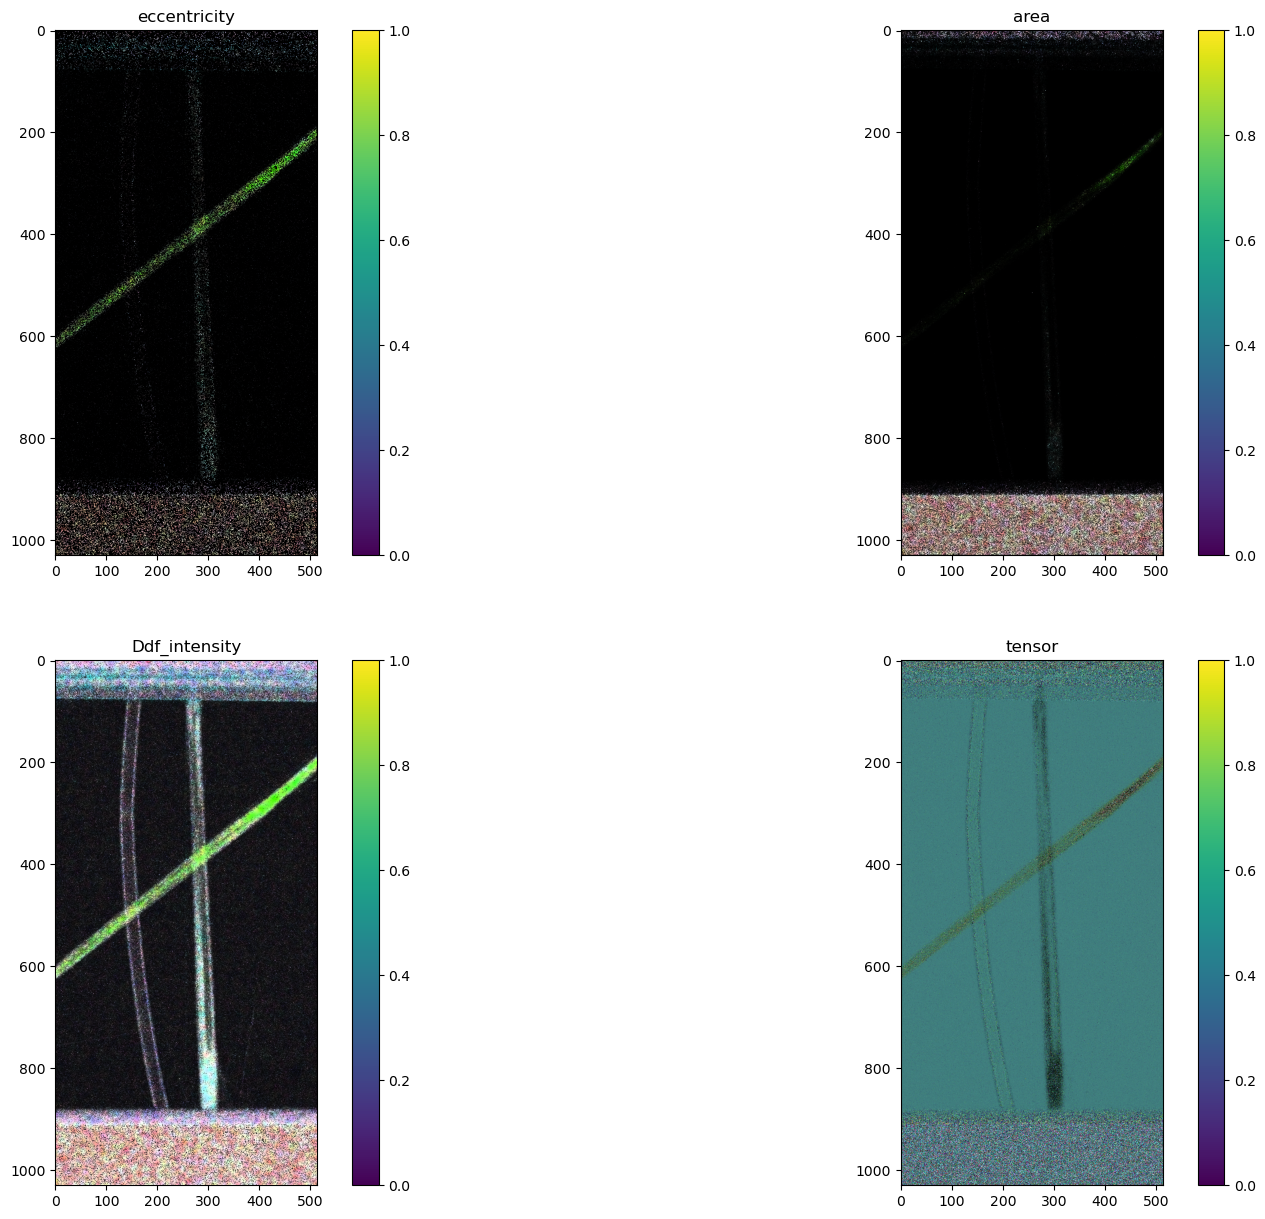

In [42]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.imshow(d[...,0])
plt.title('eccentricity')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(d[...,1])
plt.title('area')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(d[...,2])
plt.title('Ddf_intensity')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(d[...,3])
plt.title('tensor')
plt.colorbar()
plt.show()


False
Image originale :
[[0.37454012 0.         0.73199394 ... 0.07773464 0.97439481 0.98621074]
 [0.69816171 0.53609637 0.30952762 ... 0.13681863 0.95023735 0.        ]
 [0.18513293 0.54190095 0.87294584 ... 0.46349404 0.37978578 0.86333365]
 ...
 [0.42883069 0.43925036 0.39965407 ... 0.37300803 0.00509883 0.94395921]
 [0.34478452 0.47267154 0.87568577 ... 0.         0.5855911  0.46199439]
 [0.07844035 0.         0.76013666 ... 0.12825369 0.08478327 0.19624999]]

Image filtrée avec numpy :
[[       nan        nan        nan ... 0.07819845        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [0.18547421        nan        nan ...        nan        nan        nan]
 ...
 [0.42859189 0.43909782 0.39976889 ...        nan        nan 0.94307738]
 [       nan        nan        nan ...        nan        nan 0.46195326]
 [       nan        nan        nan ...        nan        nan 0.19617016]]

Image filtrée avec scipy :
[[       nan        nan        n

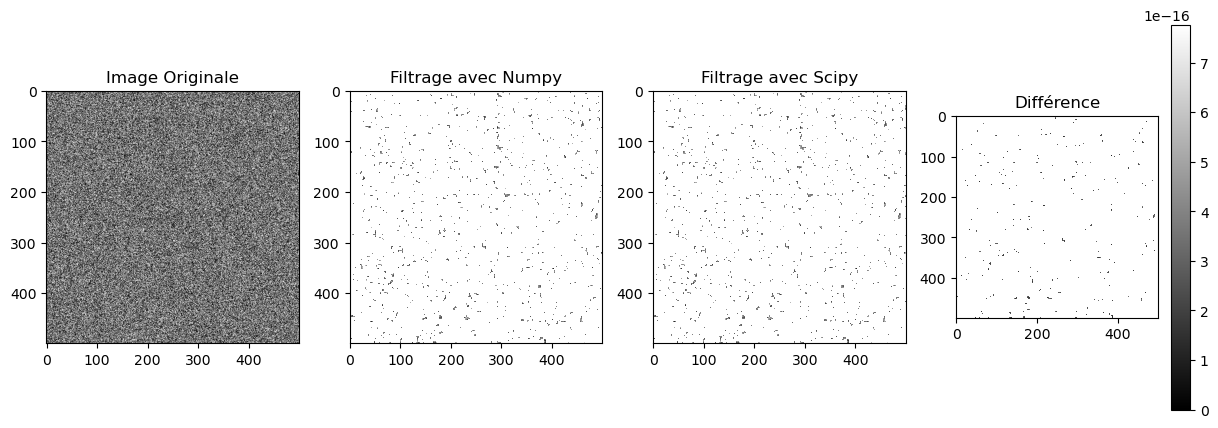

In [383]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter as scipy_gaussian_filter

def gaussian_filter(image, sigma, mode='reflect'):
    """
    Apply a Gaussian filter to the image using numpy.

    Parameters
    ----------
    image : np.ndarray
        Input image to be filtered.
    sigma : float
        Standard deviation of the Gaussian kernel.
    mode : str, optional
        Border handling mode. The default is 'reflect'.
    
    Returns
    -------
    np.ndarray
        Filtered image.
    """
    # Create Gaussian kernel
    size = int(2 * np.ceil(3 * sigma) + 1)  # Kernel size
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * 
                     np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma**2)),
        (size, size)
    )
    kernel /= np.sum(kernel)  # Normalize the kernel

    # Apply padding to the image
    if mode == 'reflect':
        pad_width = size // 2
        padded_image = np.pad(image, pad_width, mode='reflect')
    elif mode == 'constant':
        padded_image = np.pad(image, size // 2, mode='constant', constant_values=0)
    elif mode == 'nearest':
        padded_image = np.pad(image, size // 2, mode='nearest')
    else:
        raise ValueError(f"Unsupported mode: {mode}")

    # Convolution
    filtered_image = np.zeros_like(image)
    padded_height, padded_width = padded_image.shape
    kernel_height, kernel_width = kernel.shape
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Define the region of interest in the padded image
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Compute the convolution result
            filtered_image[i, j] = np.sum(region * kernel)

    return filtered_image

# Exemple d'utilisation avec une image de test incluant des zéros
if __name__ == "__main__":
    # Créer une image d'exemple avec des zéros
    np.random.seed(42)  # Pour la reproductibilité
    image = np.random.random((500, 500))  # Valeurs aléatoires entre 0 et 1
    # Introduire des zéros de manière aléatoire
    zero_mask = np.random.choice([0, 1], size=(500, 500), p=[0.1, 0.9])  # 10% de zéros
    image = np.where(zero_mask == 0, 0, image)

    # Appliquer le filtre gaussien avec numpy
    sigma = 0.25
    filtered_image_numpy = gaussian_filter(np.where(image==0,np.nan,image), sigma, mode='constant')

    # Appliquer le filtre gaussien avec scipy
    filtered_image_scipy = scipy_gaussian_filter(np.where(image==0,np.nan,image), sigma, mode='constant', cval=0)
    print(np.allclose(filtered_image_numpy, filtered_image_scipy))
    # Comparer les résultats
    print("Image originale :")
    print(image)
    print("\nImage filtrée avec numpy :")
    print(filtered_image_numpy)
    print("\nImage filtrée avec scipy :")
    print(filtered_image_scipy)

    # Afficher les images
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Image Originale')
    axes[1].imshow(filtered_image_numpy, cmap='gray')
    axes[1].set_title('Filtrage avec Numpy')
    axes[2].imshow(filtered_image_scipy, cmap='gray')
    axes[2].set_title('Filtrage avec Scipy')
    axes[3].imshow(np.abs(filtered_image_numpy - filtered_image_scipy), cmap='gray')
    #add colorbar using fig.colorbar()
    fig.colorbar(axes[3].imshow(np.abs(filtered_image_numpy - filtered_image_scipy), cmap='gray'), ax=axes[3])

    
    axes[3].set_title('Différence')
    
    plt.show()
 

Image originale :
[[0.37454012 0.         0.73199394 ... 0.07773464 0.97439481 0.98621074]
 [0.69816171 0.53609637 0.30952762 ... 0.13681863 0.95023735 0.        ]
 [0.18513293 0.54190095 0.87294584 ... 0.46349404 0.37978578 0.86333365]
 ...
 [0.42883069 0.43925036 0.39965407 ... 0.37300803 0.00509883 0.94395921]
 [0.34478452 0.47267154 0.87568577 ... 0.         0.5855911  0.46199439]
 [0.07844035 0.         0.76013666 ... 0.12825369 0.08478327 0.19624999]]

Image filtrée avec numpy :
[[1.84288452e-06 7.28874968e-06 2.60526273e-05 ... 9.68222492e-04
  9.11573584e-04 8.67182979e-04]
 [1.07239796e-05 4.50519668e-05 1.56845525e-04 ... 4.85982132e-03
  4.62880371e-03 4.40578186e-03]
 [3.69484541e-05 1.59233057e-04 5.56128678e-04 ... 1.64982447e-02
  1.57450909e-02 1.49859290e-02]
 ...
 [1.12248451e-03 5.60885629e-03 1.92955745e-02 ... 4.34995385e-01
  4.42925327e-01 4.50686839e-01]
 [1.10992295e-03 5.53974464e-03 1.91500604e-02 ... 4.21680015e-01
  4.28447237e-01 4.40305304e-01]
 [1.100875

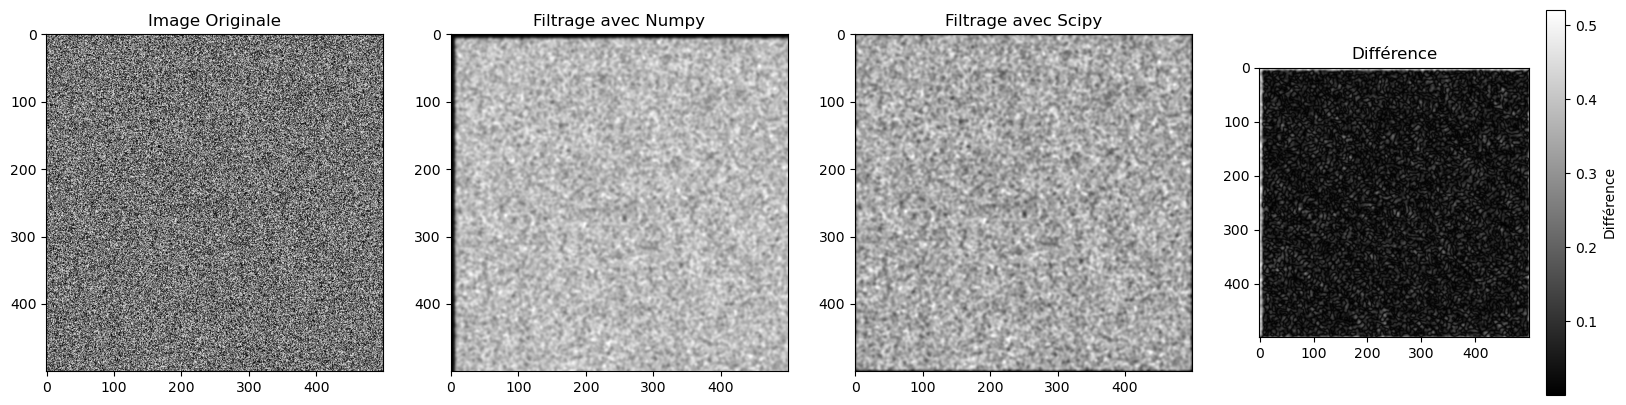

In [385]:
  import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter as scipy_gaussian_filter

def gaussian_kernel_2d(sigma, size):
    """
    Create a 2D Gaussian kernel.

    Parameters
    ----------
    sigma : float
        Standard deviation of the Gaussian kernel.
    size : int
        Size of the kernel (must be odd).

    Returns
    -------
    np.ndarray
        2D Gaussian kernel.
    """
    x = np.arange(size) - (size - 1) / 2
    x, y = np.meshgrid(x, x)
    kernel = np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

def gaussian_filter_numpy(image, sigma):
    """
    Apply a Gaussian filter to the image using the FFT with NumPy.

    Parameters
    ----------
    image : np.ndarray
        Input image to be filtered.
    sigma : float
        Standard deviation of the Gaussian kernel.

    Returns
    -------
    np.ndarray
        Filtered image.
    """
    # Create 2D Gaussian kernel
    kernel_size = int(2 * np.ceil(3 * sigma) + 1)
    kernel = gaussian_kernel_2d(sigma, kernel_size)

    # Pad the image and kernel to the same size
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    padded_kernel = np.pad(kernel, ((0, padded_image.shape[0] - kernel_size), (0, padded_image.shape[1] - kernel_size)), mode='constant', constant_values=0)
    
    # Compute the FFT of the image and the kernel
    image_fft = np.fft.fft2(padded_image)
    kernel_fft = np.fft.fft2(padded_kernel)
    
    # Convolution in the frequency domain
    filtered_fft = image_fft * kernel_fft
    
    # Compute the inverse FFT to get the filtered image
    filtered_image = np.fft.ifft2(filtered_fft)
    
    # Take the real part and crop the result to the original image size
    return np.real(filtered_image)[pad_size:-pad_size, pad_size:-pad_size]

# Exemple d'utilisation avec une grande image contenant des zéros
if __name__ == "__main__":
    # Créer une image d'exemple de 500x500 avec des valeurs aléatoires et des zéros
    np.random.seed(42)  # Pour la reproductibilité
    image = np.random.random((500, 500))  # Valeurs aléatoires entre 0 et 1
    # Introduire des zéros de manière aléatoire
    zero_mask = np.random.choice([0, 1], size=(500, 500), p=[0.1, 0.9])  # 10% de zéros
    image = np.where(zero_mask == 0, 0, image)

    # Appliquer le filtre gaussien avec numpy
    sigma = 2.0
    filtered_image_numpy = gaussian_filter_numpy(image, sigma)

    # Appliquer le filtre gaussien avec scipy
    filtered_image_scipy = scipy_gaussian_filter( image, sigma, mode='constant', cval=0)

    # Comparer les résultats
    print("Image originale :")
    print(image)
    print("\nImage filtrée avec numpy :")
    print(filtered_image_numpy)
    print("\nImage filtrée avec scipy :")
    print(filtered_image_scipy)

    # Afficher les images
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Image Originale')
    axes[1].imshow(filtered_image_numpy, cmap='gray')
    axes[1].set_title('Filtrage avec Numpy')
    axes[2].imshow(filtered_image_scipy, cmap='gray')
    axes[2].set_title('Filtrage avec Scipy')
    axes[3].imshow(np.abs(filtered_image_numpy - filtered_image_scipy), cmap='gray')
    axes[3].set_title('Différence')
    
    # Ajouter une colorbar
    cbar = plt.colorbar(axes[3].imshow(np.abs(filtered_image_numpy - filtered_image_scipy), cmap='gray'), ax=axes[3])
    cbar.set_label('Différence')

    plt.show()


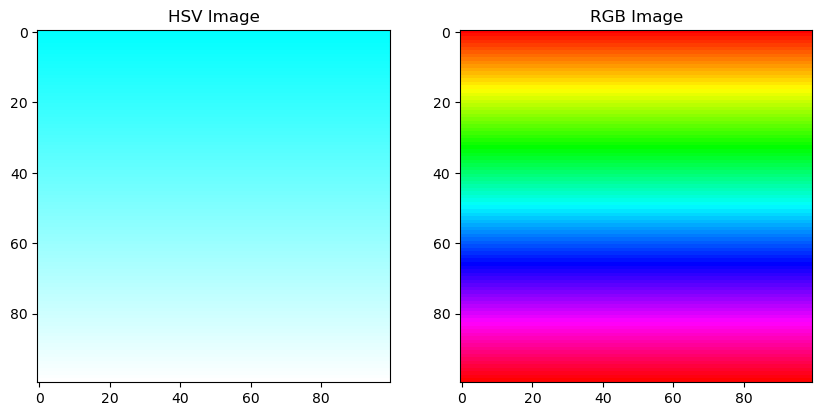

In [2]:
import numpy as np
from matplotlib.colors import hsv_to_rgb
def hsv_to_rgb_np(hsv):
    """
    Convert hsv values to rgb.

    Parameters
    ----------
    hsv : (..., 3) array-like
       All values assumed to be in range [0, 1]

    Returns
    -------
    rgb : (..., 3) ndarray
       Colors converted to RGB values in range [0, 1]
    """
    hsv = np.asarray(hsv)

    # check length of the last dimension, should be _some_ sort of rgb
    if hsv.shape[-1] != 3:
        raise ValueError("Last dimension of input array must be 3; "
                         "shape {shp} was found.".format(shp=hsv.shape))

    in_shape = hsv.shape
    hsv = np.array(
        hsv, copy=False,
        dtype=np.promote_types(hsv.dtype, np.float32),  # Don't work on ints.
        ndmin=2,  # In case input was 1D.
    )

    h = hsv[..., 0]
    s = hsv[..., 1]
    v = hsv[..., 2]

    r = np.empty_like(h)
    g = np.empty_like(h)
    b = np.empty_like(h)

    i = (h * 6.0).astype(int)
    f = (h * 6.0) - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))

    idx = i % 6 == 0
    r[idx] = v[idx]
    g[idx] = t[idx]
    b[idx] = p[idx]

    idx = i == 1
    r[idx] = q[idx]
    g[idx] = v[idx]
    b[idx] = p[idx]

    idx = i == 2
    r[idx] = p[idx]
    g[idx] = v[idx]
    b[idx] = t[idx]

    idx = i == 3
    r[idx] = p[idx]
    g[idx] = q[idx]
    b[idx] = v[idx]

    idx = i == 4
    r[idx] = t[idx]
    g[idx] = p[idx]
    b[idx] = v[idx]

    idx = i == 5
    r[idx] = v[idx]
    g[idx] = p[idx]
    b[idx] = q[idx]

    idx = s == 0
    r[idx] = v[idx]
    g[idx] = v[idx]
    b[idx] = v[idx]

    rgb = np.stack([r, g, b], axis=-1)

    return rgb.reshape(in_shape)


# Exemple d'utilisation
if __name__ == "__main__":
    # Créer une image HSV exemple avec un dégradé de teinte
    height, width = 100, 100
    H = np.linspace(0, 1, width).repeat(height).reshape((height, width))
    S = np.ones((height, width))  # Saturation à 1
    V = np.ones((height, width))  # Valeur à 1

    hsv_image = np.stack((H, S, V), axis=-1)

    # Convertir HSV en RGB avec votre fonction
    rgb_image = hsv_to_rgb_np(hsv_image)
    rgb_image_hsv = hsv_to_rgb(hsv_image)
    # Afficher les images
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('HSV Image')
    plt.imshow(hsv_image)
    plt.subplot(1, 2, 2)
    plt.title('RGB Image')
    plt.imshow(rgb_image)
    plt.show()


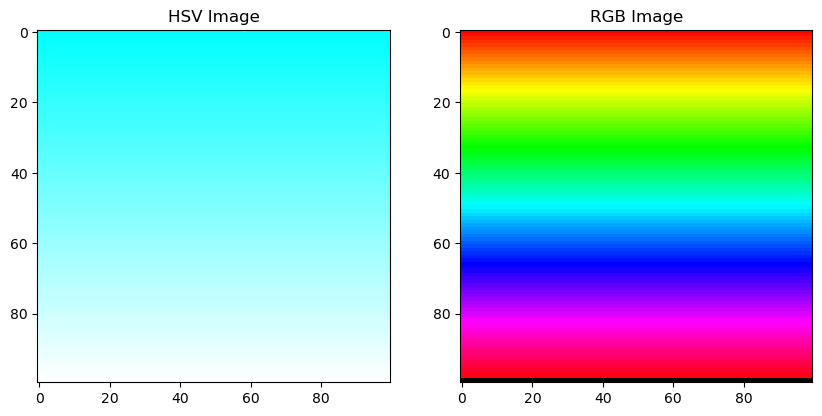

In [5]:
import numpy as np

def hsv_to_rgb(hsv):
    """
    Convert an array of HSV values (in the range [0, 1]) to RGB values.

    Parameters
    ----------
    hsv : (..., 3) array-like
        Input array with HSV values. Each pixel should be in the range [0, 1] with HSV channels.
        Hue should be in [0, 1), Saturation and Value should be in [0, 1].

    Returns
    -------
    (..., 3) `~numpy.ndarray`
        Converted RGB values in the range [0, 1].
    """
    hsv = np.asarray(hsv)

    # Check that the last dimension is 3 (for H, S, V)
    if hsv.shape[-1] != 3:
        raise ValueError("Last dimension of input array must be 3; "
                         f"shape {hsv.shape} was found.")

    in_shape = hsv.shape
    hsv = np.array(hsv, copy=False, dtype=np.float32, ndmin=2)

    H, S, V = hsv[..., 0], hsv[..., 1], hsv[..., 2]

    # Compute intermediate values
    C = S * V
    X = C * (1 - np.abs((H * 6) % 2 - 1))
    m = V - C

    # Initialize RGB arrays
    R, G, B = np.zeros_like(H), np.zeros_like(H), np.zeros_like(H)

    # Apply conversion based on the hue range
    mask1 = (H >= 0) & (H < 1/6)
    mask2 = (H >= 1/6) & (H < 1/3)
    mask3 = (H >= 1/3) & (H < 1/2)
    mask4 = (H >= 1/2) & (H < 2/3)
    mask5 = (H >= 2/3) & (H < 5/6)
    mask6 = (H >= 5/6) & (H < 1)

    R[mask1], G[mask1], B[mask1] = C[mask1], X[mask1], 0
    R[mask2], G[mask2], B[mask2] = X[mask2], C[mask2], 0
    R[mask3], G[mask3], B[mask3] = 0, C[mask3], X[mask3]
    R[mask4], G[mask4], B[mask4] = 0, X[mask4], C[mask4]
    R[mask5], G[mask5], B[mask5] = X[mask5], 0, C[mask5]
    R[mask6], G[mask6], B[mask6] = C[mask6], 0, X[mask6]

    # Adjust RGB values by adding the minimum value
    R += m
    G += m
    B += m

    # Ensure RGB values are within [0, 1]
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    # Stack RGB channels to form the RGB image
    rgb = np.stack((R, G, B), axis=-1)

    return rgb.reshape(in_shape)

# Exemple d'utilisation
if __name__ == "__main__":
    # Créer une image HSV exemple avec un dégradé de teinte
    height, width = 100, 100
    H = np.linspace(0, 1, width).repeat(height).reshape((height, width))
    S = np.ones((height, width))  # Saturation à 1
    V = np.ones((height, width))  # Valeur à 1

    hsv_image = np.stack((H, S, V), axis=-1)

    # Convertir HSV en RGB avec votre fonction
    rgb_image = hsv_to_rgb(hsv_image)

    # Afficher les images
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('HSV Image')
    plt.imshow(hsv_image)
    plt.subplot(1, 2, 2)
    plt.title('RGB Image')
    plt.imshow(rgb_image)
    plt.show()
